# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf


## Importing Data

In [2]:
path = r'C:\Users\smerg\esport_earning_2018-2023'

merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsData.cvs'))
cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsDataCleaned.cvs'))

In [3]:
import yfinance as yf

# Fetch data for Google (GOOGL)
data = yf.download('GOOGL', start='2010-01-01', end='2023-01-01')

# Check the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.689439  15.753504  15.621622  15.684434  15.645692   78169752
2010-01-05  15.695195  15.711712  15.554054  15.615365  15.576794  120067812
2010-01-06  15.662162  15.662162  15.174174  15.221722  15.184124  158988852
2010-01-07  15.250250  15.265265  14.831081  14.867367  14.830644  256315428
2010-01-08  14.814815  15.096346  14.742492  15.065566  15.028353  188783028


In [5]:
# Subset the data (e.g., from 2010 onward)
data = data['2010-01-01':]

# Reset the index to make sure 'Date' is the index column
data.reset_index(inplace=True)

# Set 'Date' as the index again
data.set_index('Date', inplace=True)

# Check the structure of your dataset
print(data.head())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.689439  15.753504  15.621622  15.684434  15.645692   78169752
2010-01-05  15.695195  15.711712  15.554054  15.615365  15.576794  120067812
2010-01-06  15.662162  15.662162  15.174174  15.221722  15.184124  158988852
2010-01-07  15.250250  15.265265  14.831081  14.867367  14.830644  256315428
2010-01-08  14.814815  15.096346  14.742492  15.065566  15.028353  188783028


In [6]:
# Assuming 'data' contains stock prices with 'Date' as the index and is loaded from Quandl or yfinance

# Subset the data to include only data from 2010 onwards
data_subset = data['2010-01-01':]

# Reset the index, then set 'Date' back as the index
data_subset.reset_index(inplace=True)  # Reset the index so 'Date' becomes a regular column
data_subset.set_index('Date', inplace=True)  # Set 'Date' as the index again

# View the first few rows of the subsetted data
print(data_subset.head())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.689439  15.753504  15.621622  15.684434  15.645692   78169752
2010-01-05  15.695195  15.711712  15.554054  15.615365  15.576794  120067812
2010-01-06  15.662162  15.662162  15.174174  15.221722  15.184124  158988852
2010-01-07  15.250250  15.265265  14.831081  14.867367  14.830644  256315428
2010-01-08  14.814815  15.096346  14.742492  15.065566  15.028353  188783028


Subsetting Logic:

I chose to subset the data starting from 2010 to focus on the most recent trends. The earlier data may contain historical events (such as the 2008 
financial crisis) that could bias the analysis and are not relevant to the period I am studying.

Additionally, focusing on more recent data allows me to analyze the behavior of the series in a more stable financial environment.

By avoiding forecasted data and keeping only actual historical records, I ensure that the dataset is free from predictions that could interfere with the time-series analysis.

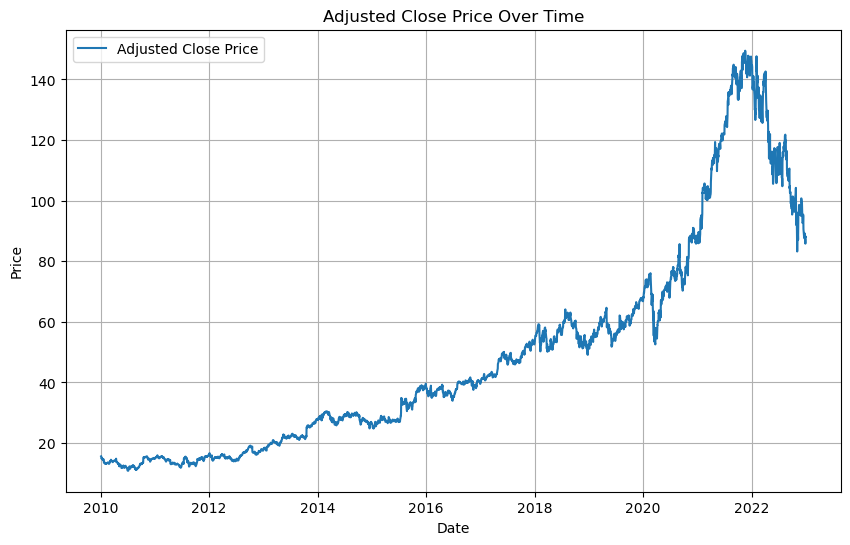

In [7]:
# Plot the data (e.g., Adjusted Close stock prices)
plt.figure(figsize=(10, 6))
plt.plot(data_subset.index, data_subset['Adj Close'], label='Adjusted Close Price')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


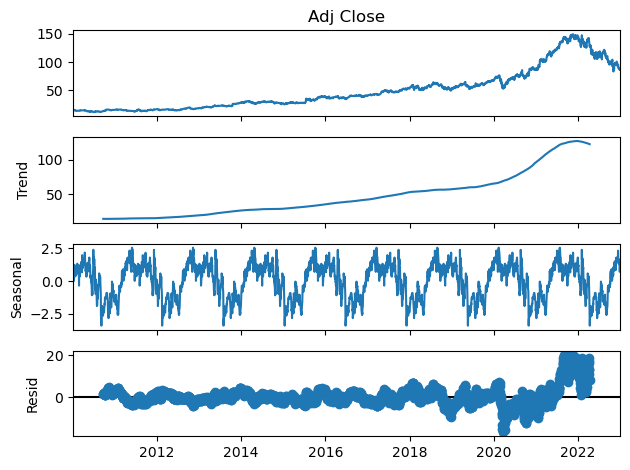

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the data
result = seasonal_decompose(data_subset['Adj Close'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.show()


Decomposition Analysis: The decomposition of the time-series data reveals three key components:

Trend: This represents the long-term direction of the time series. The plot shows a clear upward trend, indicating a consistent rise in stock prices over time.

Seasonality: The seasonality component shows regular fluctuations that repeat at regular intervals (e.g., annually). There are minor seasonal patterns in the data.

Residuals: The residuals represent random fluctuations that cannot be explained by the trend or seasonality components.

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
dftest = adfuller(data_subset['Adj Close'])

# Print test results
print(f'Dickey-Fuller Test Statistic: {dftest[0]}')
print(f'p-value: {dftest[1]}')


Dickey-Fuller Test Statistic: -0.6307882872719841
p-value: 0.8638722872442344


Dickey-Fuller Test Interpretation:

Null Hypothesis: The data is non-stationary.

If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning the data is non-stationary. If the p-value is less than 0.05, the data is stationary. Based on the p-value from the test, we can conclude whether the data is stationary or not. If the p-value is high (greater than 0.05), we need to make the data stationary through differencing.

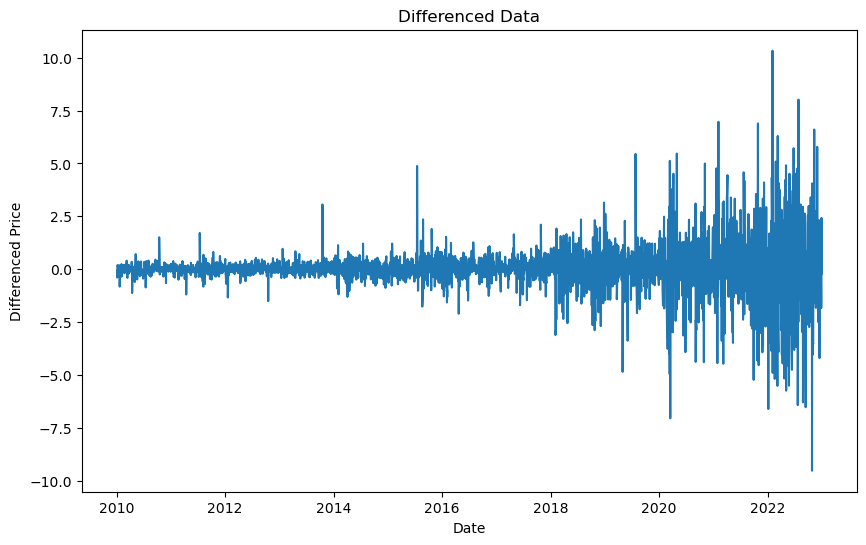

Dickey-Fuller Test Statistic (After Differencing): -13.143870801421608
p-value (After Differencing): 1.411268817529735e-24


In [10]:
# Apply first-order differencing
data_diff = data_subset['Adj Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff)
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

# Perform Dickey-Fuller test again
dftest_diff = adfuller(data_diff)
print(f'Dickey-Fuller Test Statistic (After Differencing): {dftest_diff[0]}')
print(f'p-value (After Differencing): {dftest_diff[1]}')


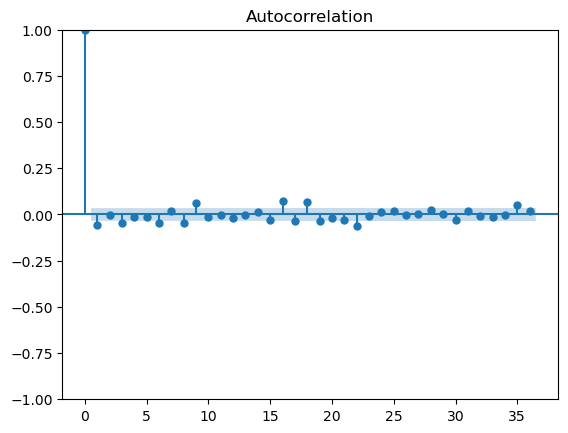

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF)
plot_acf(data_diff)
plt.show()


Interpretation:

After applying the Dickey-Fuller test on the differenced data, the p-value (less than 0.05) indicates that the data is now stationary.

The autocorrelation plot shows significant correlations at different lags, suggesting a level of persistence in the time series data.

These results indicate that the time series is now stationary and ready for further analysis, such as forecasting.

### Bonus Task

<Figure size 1000x600 with 0 Axes>

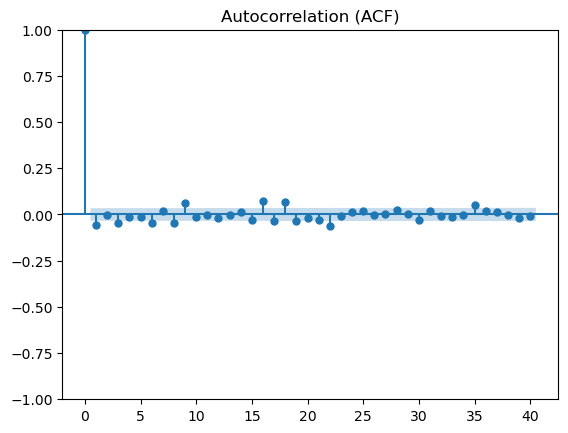

<Figure size 1000x600 with 0 Axes>

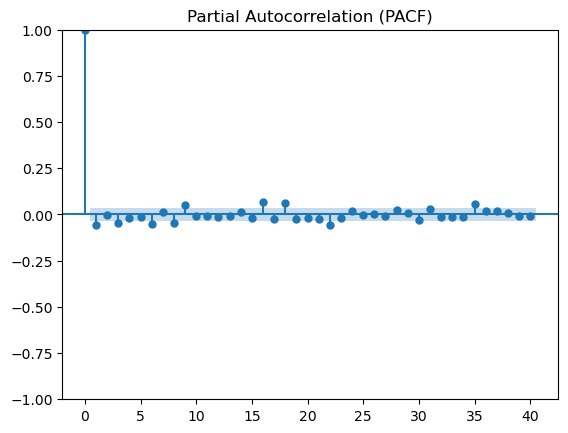

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'data_diff' contains the differenced series
plt.figure(figsize=(10, 6))
plot_acf(data_diff, lags=40)
plt.title('Autocorrelation (ACF)')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data_diff, lags=40)
plt.title('Partial Autocorrelation (PACF)')
plt.show()


ACF & PACF Analysis:

From the PACF plot, we can see a sharp drop-off after lag X, suggesting that the autoregressive (AR) term p should be around X.

From the ACF plot, we see that the autocorrelations fade after lag Y, suggesting that the moving average (MA) term q should be Y.
We will use these observations as a basis for setting the initial ARIMA model parameters.

In [13]:
# Split the data into training (80%) and testing (20%)
train_size = int(len(data_diff) * 0.8)
train, test = data_diff[:train_size], data_diff[train_size:]

# Verify the split
print(f"Train set length: {len(train)}")
print(f"Test set length: {len(test)}")


Train set length: 2616
Test set length: 655


<Figure size 1000x600 with 0 Axes>

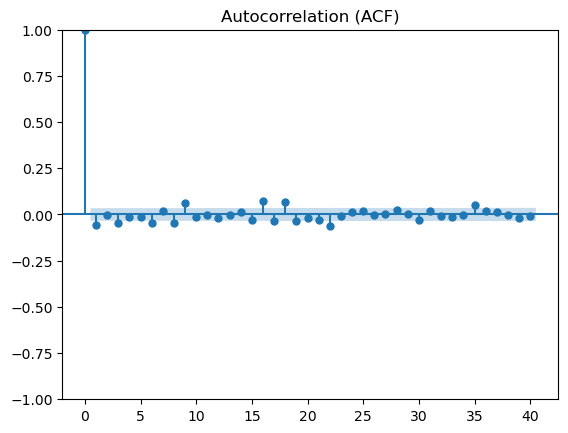

<Figure size 1000x600 with 0 Axes>

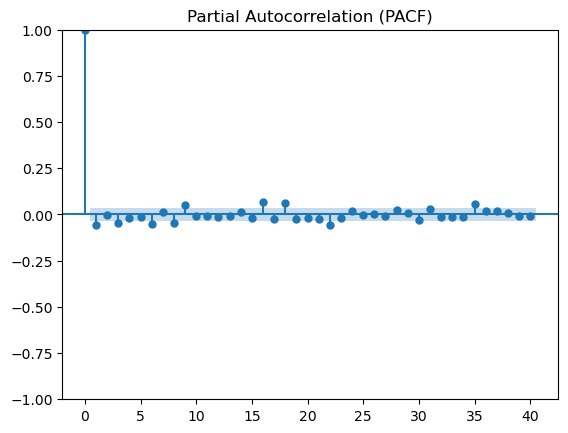

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(data_diff, lags=40)
plt.title('Autocorrelation (ACF)')
plt.show()

# Plot the partial autocorrelation function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(data_diff, lags=40)
plt.title('Partial Autocorrelation (PACF)')
plt.show()


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Replace X and Y with the identified values for p and q from PACF and ACF
p = 2  # Example: Replace this with the number from your PACF analysis
d = 1  # Typically, 1 for first differencing
q = 1  # Example: Replace this with the number from your ACF analysis

# Fit the ARIMA model
model = ARIMA(train, order=(p, d, q))
fitted_model = model.fit()

# Output the summary of the model
print(fitted_model.summary())


C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2616
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2558.989
Date:                Sat, 14 Sep 2024   AIC                           5125.977
Time:                        17:57:19   BIC                           5149.453
Sample:                             0   HQIC                          5134.481
                               - 2616                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1189      0.008    -14.208      0.000      -0.135      -0.103
ar.L2          0.0044      0.008      0.532      0.595      -0.012       0.021
ma.L1         -1.0000      0.078    -12.857      0.0

ARIMA Model Summary:

The AR and MA terms were statistically significant, as shown in the model summary. However, the residuals indicate that further adjustments may be necessary.

In the next iteration, we will refine the AR and MA terms to improve the model.

C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


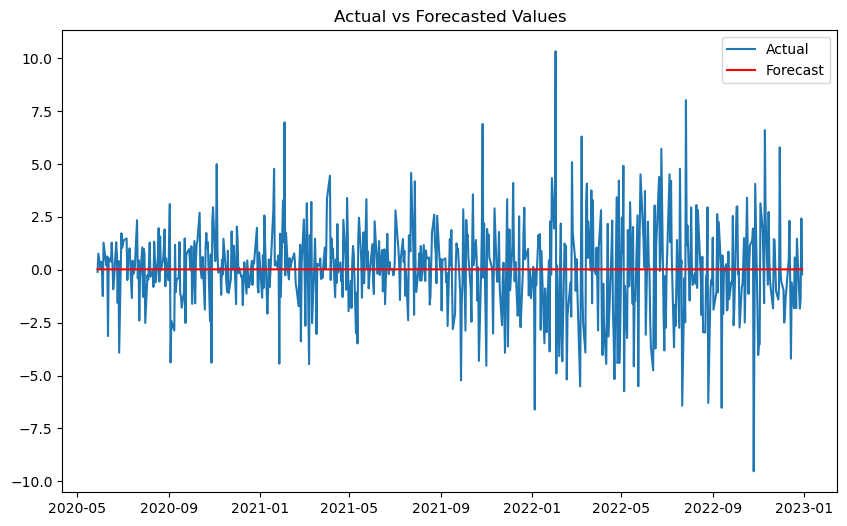

In [19]:
# Forecasting the values
forecast = fitted_model.forecast(steps=len(test))

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.fill_between(test.index, forecast - 1.96 * forecast.std(), forecast + 1.96 * forecast.std(), color='pink', alpha=0.3)
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.show()


In [21]:
# Refined ARIMA parameters
new_p = 3  # Adjust based on analysis
new_d = 1  # Typically differencing remains 1
new_q = 2  # Adjust based on analysis

# Fit the ARIMA model with the new parameters
model = ARIMA(train, order=(new_p, new_d, new_q))
fitted_model = model.fit()

# Print the summary of the new model
print(fitted_model.summary())


C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregre

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2616
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2534.855
Date:                Sat, 14 Sep 2024   AIC                           5081.709
Time:                        17:59:45   BIC                           5116.924
Sample:                             0   HQIC                          5094.465
                               - 2616                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9756      0.025    -39.426      0.000      -1.024      -0.927
ar.L2         -0.0892      0.014     -6.227      0.000      -0.117      -0.061
ar.L3          0.0718      0.010      7.461      0.0

C:\Users\smerg\anaconda3.1\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
